# Introduction

In [1]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import random
from PIL import Image
#import torch.nn as nn
#import torch.optim as optim
#import torchvision
#import torchvision.transforms as transforms
#from torch.utils.data import DataLoader, random_split

# Data Loading and Analysis

In [2]:
img_dir = '/kaggle/input/garbage-classification/Garbage classification/Garbage classification/'
class_names = os.listdir(img_dir)
num_classes = len(class_names)

train_dir = '/kaggle/input/garbage-classification/one-indexed-files-notrash_train.txt'
test_dir = '/kaggle/input/garbage-classification/one-indexed-files-notrash_test.txt'
val_dir = '/kaggle/input/garbage-classification/one-indexed-files-notrash_val.txt'

df_train = pd.read_csv(train_dir, sep = ' ', header = None, names = ['path', 'label'])
df_test = pd.read_csv(test_dir, sep = ' ', header = None, names = ['path', 'label'])
df_val = pd.read_csv(val_dir, sep = ' ', header = None, names = ['path', 'label'])

print(f"Found {len(df_train)} training images, {len(df_test)} test images, {len(df_val)} validation images ")
print(f"Found {num_classes} classes: {class_names}")

Found 1768 training images, 431 test images, 328 validation images 
Found 6 classes: ['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']


In [3]:
image_counts = {}

for class_name in class_names:
    class_path = os.path.join(img_dir, class_name)
    num_images = len(os.listdir(class_path))
    image_counts[class_name] = num_images
    print(f"Class: {class_name}, number of images: {num_images}")

Class: metal, number of images: 410
Class: glass, number of images: 501
Class: paper, number of images: 594
Class: trash, number of images: 137
Class: cardboard, number of images: 403
Class: plastic, number of images: 482


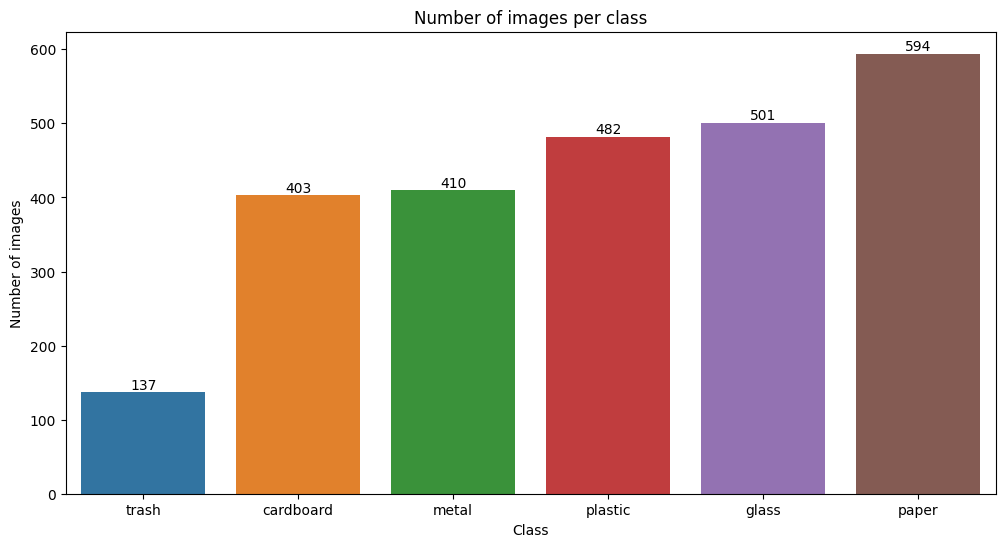

In [4]:
df_counts = pd.DataFrame(list(image_counts.items()), columns = ['Class', 'Count'])

plt.figure(figsize = (12,6))
ax = sns.barplot(x = 'Class', y = 'Count', data = df_counts.sort_values(by = 'Count'))
plt.title('Number of images per class')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.bar_label(ax.containers[0], fontsize=10)
plt.show()

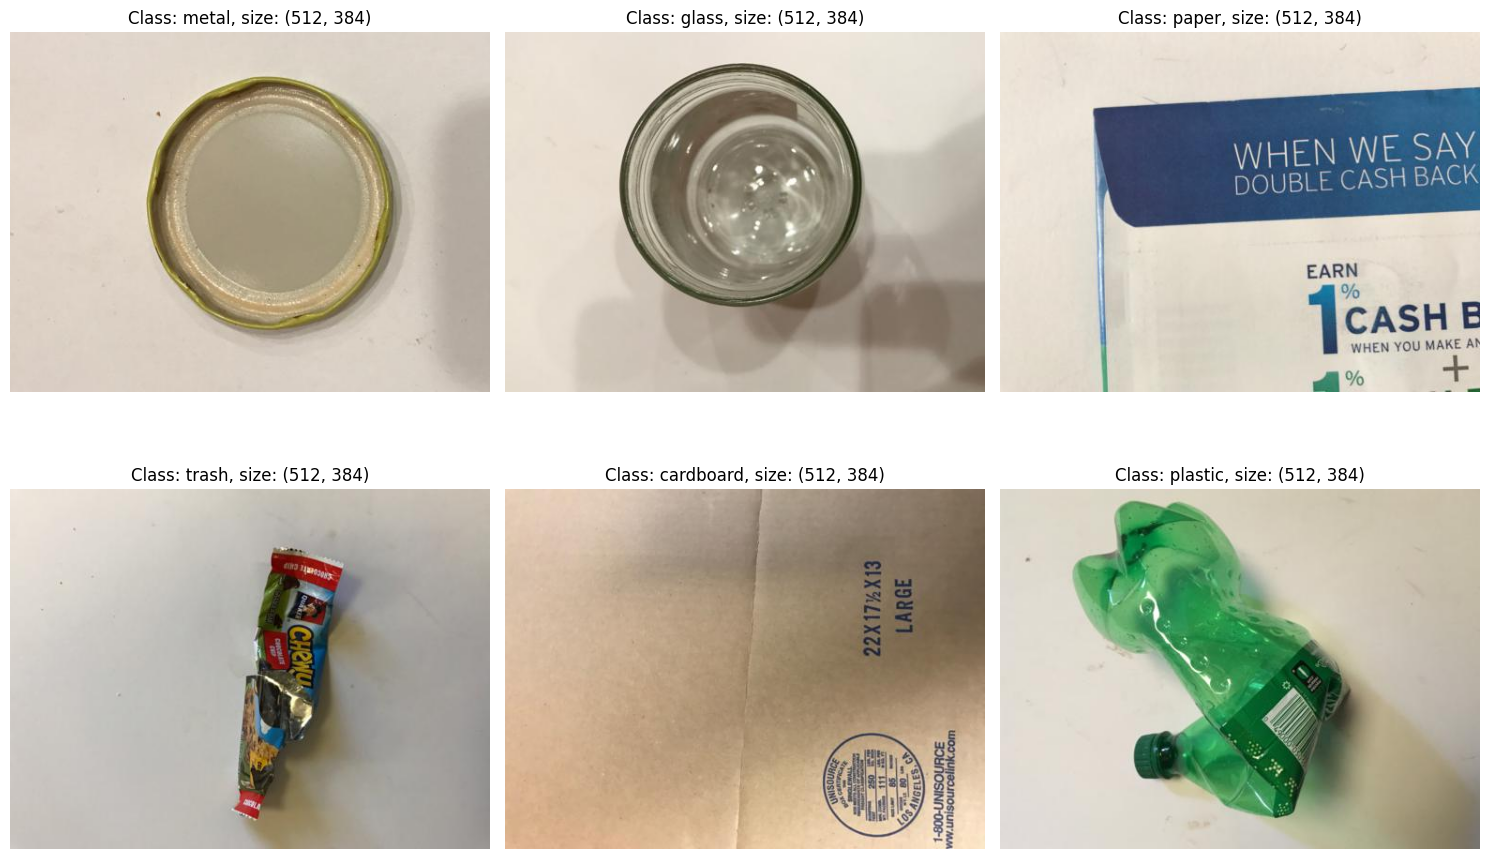

In [5]:
random.seed(42)
plt.figure(figsize = (15, 10))
for i, class_name in enumerate(class_names):
    class_path = os.path.join(img_dir, class_name)
    random_image_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, random_image_name)
    plt.subplot(2, 3, i + 1)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Class: {class_name}, size: {img.size}")
    plt.axis('off')

plt.tight_layout()
plt.show()